<a href="https://colab.research.google.com/github/imsakshi/Data-Analytics----13-May-2020/blob/master/UCIBankMarketingdataser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, i have to learn how to bring or read data file at google collab.

In [0]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving bank-additional.csv to bank-additional.csv


In [0]:
import io
import pandas as pd
dataset = pd.read_csv(io.BytesIO(uploaded["bank-additional.csv"]),index_col= False,sep=";",na_values='unknown')

In [13]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [14]:
dataset.shape #There are 4119 rows and 21 coloumns.

(4119, 21)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [16]:
dataset.describe() #describe returns descriptive statistics.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
dataset.isnull().sum()

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [0]:
#in this dataset nan values is represented by "unknown" instead of nan therefore while reading csv, we replaced
na_values = "unknown" and sometimes nan values is also been represented by "?" or "/.." or "empty" .

In this dataset our isna() function is saying that there is no null value in any column but when we closely analyze the dataset we found some cells of data are filled with "unknown" , which is again considered as nan or not available values.
Now, my task is to make a count of unknown cells.

In [0]:
import numpy as np

In [0]:
#To extract columns that contain missing values.
miss_cond = np.array(dataset.isnull().sum()!=0)

In [21]:
miss_cond #True jha pr null value present h

array([False,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
miss_col_ind = np.where(miss_cond)[0]

In [25]:
miss_col_ind

array([1, 2, 3, 4, 5, 6])

In [26]:
#i need to print col names --- jha pr null value h
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [0]:
miss_cols = list(dataset.columns[miss_col_ind])

In [28]:
miss_cols 

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [30]:
#A list to store all the unique values and their count from the column that contains missing values.
dataset['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
Name: job, dtype: int64

In [0]:
#list ka .append() kya krta h?
#add a element at the end
miss_col_freq = []
for i in miss_col_ind:
  miss_col_freq.append(dataset.iloc[:,i].value_counts())

In [32]:
miss_col_freq

[admin.           1012
 blue-collar       884
 technician        691
 services          393
 management        324
 retired           166
 self-employed     159
 entrepreneur      148
 unemployed        111
 housemaid         110
 student            82
 Name: job, dtype: int64, married     2509
 single      1153
 divorced     446
 Name: marital, dtype: int64, university.degree      1264
 high.school             921
 basic.9y                574
 professional.course     535
 basic.4y                429
 basic.6y                228
 illiterate                1
 Name: education, dtype: int64, no     3315
 yes       1
 Name: default, dtype: int64, yes    2175
 no     1839
 Name: housing, dtype: int64, no     3349
 yes     665
 Name: loan, dtype: int64]

In [0]:
#creating a fresh dataset to store only fragment of the original dataset that needs preprocessing.
dataset_miss = dataset[miss_cols]

In [34]:
dataset_miss

,job,marital,education,default,housing,loan
0,blue-collar,married,basic.9y,no,yes,no
1,services,single,high.school,no,no,no
2,services,married,high.school,no,yes,no
3,services,married,basic.9y,no,NaN,NaN
4,admin.,married,university.degree,no,yes,no
...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes
4115,admin.,married,high.school,no,yes,no
4116,student,single,high.school,no,no,no
4117,admin.,married,high.school,no,no,no


In [35]:
dataset_miss.isnull().sum() #this i did just to cross check

job           39
marital       11
education    167
default      803
housing      105
loan         105
dtype: int64

In [0]:
#Appending NAN and its count in the missing_col_freq list.
for i  in range(6):
  miss_col_freq[i] = miss_col_freq[i].append(pd.Series({"null" : dataset_miss.isnull().sum()[i]}))

In [37]:
miss_col_freq

[admin.           1012
 blue-collar       884
 technician        691
 services          393
 management        324
 retired           166
 self-employed     159
 entrepreneur      148
 unemployed        111
 housemaid         110
 student            82
 null               39
 dtype: int64, married     2509
 single      1153
 divorced     446
 null          11
 dtype: int64, university.degree      1264
 high.school             921
 basic.9y                574
 professional.course     535
 basic.4y                429
 basic.6y                228
 illiterate                1
 null                    167
 dtype: int64, no      3315
 yes        1
 null     803
 dtype: int64, yes     2175
 no      1839
 null     105
 dtype: int64, no      3349
 yes      665
 null     105
 dtype: int64]

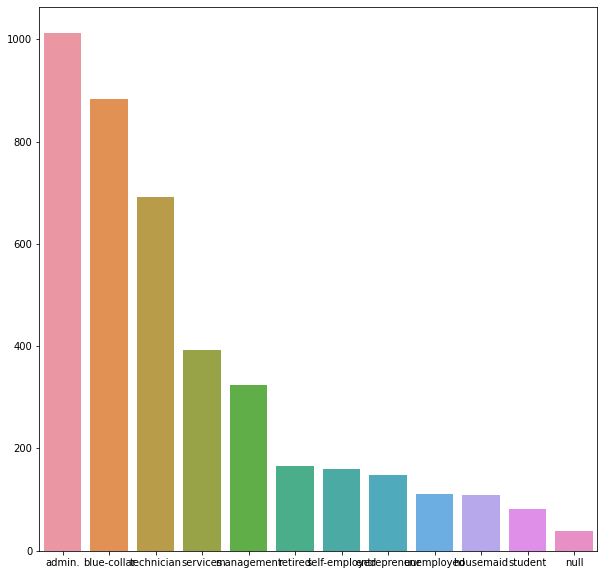

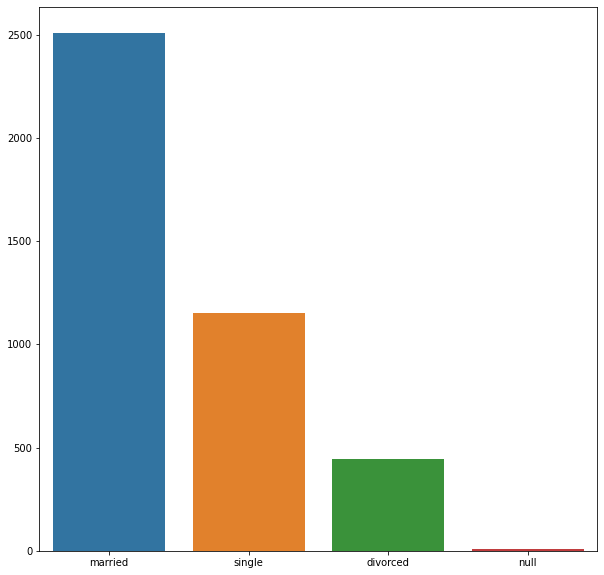

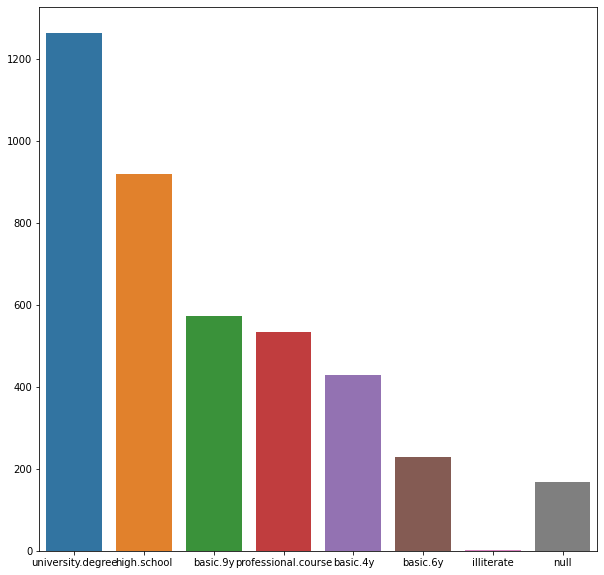

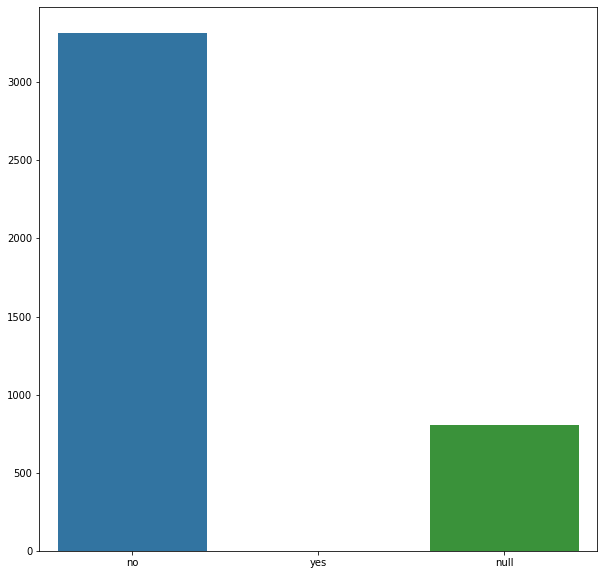

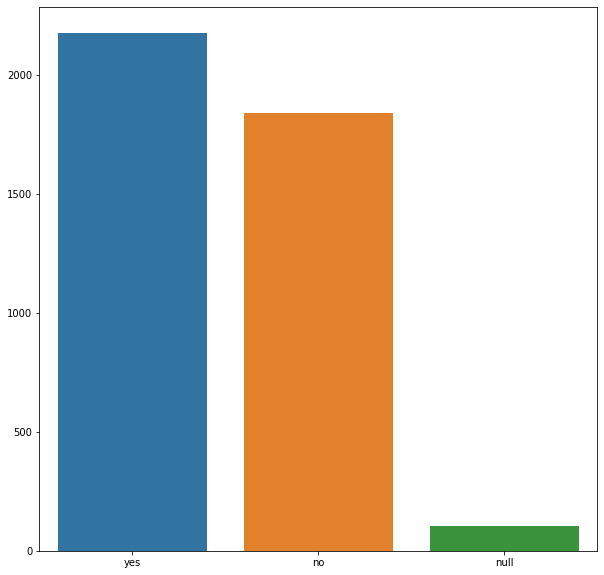

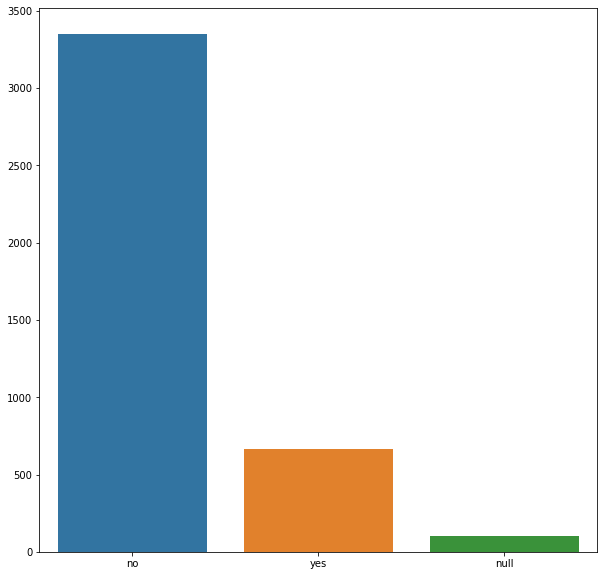

In [46]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(6):
  plt.figure(figsize = (10,10))
  sns.barplot(miss_col_freq[i].index,miss_col_freq[i].values)
  plt.show()  

Now, we have to fill our missing values and to fill maissing values we have many ways:
1. By using pandas
  .fillna()
2. Scikit library --- python library for machine learning.
                      It also includes many function s for data preprocessing.
                      Scaling,Normalize
                       We can use imputer to fill nan values

In [47]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = "most_frequent")
sim.fit(dataset_miss)
print("NaN values shall be replaced by following values: " , sim.statistics_)

NaN values shall be replaced by following values:  ['admin.' 'married' 'university.degree' 'no' 'yes' 'no']


In [0]:
#Replacing the NaN values and double checking the result
dataset_miss = pd.DataFrame(sim.transform(dataset_miss))

In [50]:
dataset_miss

,0,1,2,3,4,5
0,blue-collar,married,basic.9y,no,yes,no
1,services,single,high.school,no,no,no
2,services,married,high.school,no,yes,no
3,services,married,basic.9y,no,yes,no
4,admin.,married,university.degree,no,yes,no
...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes
4115,admin.,married,high.school,no,yes,no
4116,student,single,high.school,no,no,no
4117,admin.,married,high.school,no,no,no


In [49]:
dataset_miss.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64